In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=75e5a8a5017ea65166fe100efe0a2f3de31fda650cf9e6e58299894308fc4f26
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
!pip install pathlib

In [51]:
import pathlib
import struct

def make_wav_format(pcm_data: bytes, ch: int) -> bytes:
    """
    pcm_data를 통해서 wav 헤더를 만들고 wav 형식으로 저장한다.
    :param pcm_data: pcm bytes
    :param ch: 채널 수
    :return wav: wave bytes
    """
    waves = []
    waves.append(struct.pack('<4s', b'RIFF'))
    waves.append(struct.pack('I', 1))
    waves.append(struct.pack('4s', b'WAVE'))
    waves.append(struct.pack('4s', b'fmt '))
    waves.append(struct.pack('I', 16))
    # audio_format, channel_cnt, sample_rate, bytes_rate(sr*blockalign:초당 바이츠수), block_align, bps
    if ch == 2:
        waves.append(struct.pack('HHIIHH', 1, 2, 16000, 64000, 4, 16))
    else:
        waves.append(struct.pack('HHIIHH', 1, 1, 16000, 32000, 2, 16))
    waves.append(struct.pack('<4s', b'data'))
    waves.append(struct.pack('I', len(pcm_data)))
    waves.append(pcm_data)
    waves[1] = struct.pack('I', sum(len(w) for w in waves[2:]))
    return b''.join(waves)

# PCM 파일이 있는 디렉토리 경로
pcm_directory = '/content/drive/MyDrive/Q3'  # 실제 디렉토리 경로로 대체해주세요

# 디렉토리 내의 모든 PCM 파일을 순회하면서 WAV 파일로 변환
for pcm_file_path in pathlib.Path(pcm_directory).glob("*.pcm"):
    pcm_bytes = pcm_file_path.read_bytes()
    wav_bytes = make_wav_format(pcm_bytes, 1)
    wav_filename = pcm_file_path.stem + ".wav"
    wav_file_path = os.path.join(pcm_directory, wav_filename)

    with open(wav_file_path, 'wb') as file:
        file.write(wav_bytes)
    print(f"{pcm_file_path}를 {wav_file_path}로 성공적으로 변환하였습니다.")


/content/drive/MyDrive/Q3/task3_03.pcm를 /content/drive/MyDrive/Q3/task3_03.wav로 성공적으로 변환하였습니다.
/content/drive/MyDrive/Q3/task3_01.pcm를 /content/drive/MyDrive/Q3/task3_01.wav로 성공적으로 변환하였습니다.
/content/drive/MyDrive/Q3/task3_02.pcm를 /content/drive/MyDrive/Q3/task3_02.wav로 성공적으로 변환하였습니다.
/content/drive/MyDrive/Q3/task3_04.pcm를 /content/drive/MyDrive/Q3/task3_04.wav로 성공적으로 변환하였습니다.
/content/drive/MyDrive/Q3/task3_05.pcm를 /content/drive/MyDrive/Q3/task3_05.wav로 성공적으로 변환하였습니다.


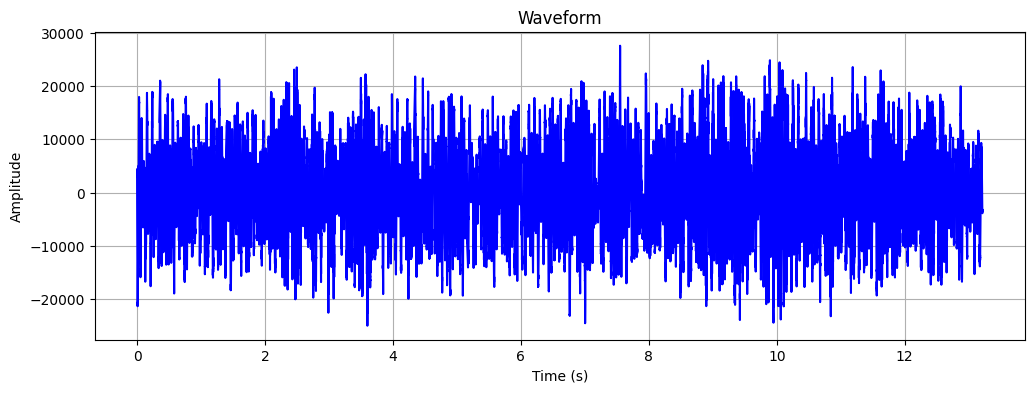

In [61]:
import wave
import matplotlib.pyplot as plt
import numpy as np

# WAV 파일 경로
wav_file_path = '/content/drive/MyDrive/Q3/task3_04.wav'  # 실제 파일 경로로 대체해주세요

# WAV 파일 열기
with wave.open(wav_file_path, 'rb') as wav_file:
    # WAV 파일 데이터 읽기
    wav_data = wav_file.readframes(-1)
    wav_data = np.frombuffer(wav_data, dtype=np.int16)  # 바이너리 데이터를 numpy 배열로 변환

# 시간 배열 생성
frame_rate = wav_file.getframerate()
time = np.linspace(0, len(wav_data) / frame_rate, num=len(wav_data))

# 그래프 그리기
plt.figure(figsize=(12, 4))
plt.plot(time, wav_data, color='b')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [73]:
import wave
import numpy as np
import os

# WAV 파일이 있는 디렉토리 경로
directory = '/content/drive/MyDrive/Q3'  # 실제 디렉토리 경로로 대체해주세요

# 디렉토리 내의 모든 WAV 파일을 순회하면서 무음 구간 찾기
for wav_file_path in os.listdir(directory):
    if wav_file_path.endswith(".wav"):
        try:
            # WAV 파일 열기
            with wave.open(os.path.join(directory, wav_file_path), 'rb') as wav_file:
                # WAV 파일의 샘플 레이트 가져오기
                sample_rate = wav_file.getframerate()

                # WAV 파일 데이터를 numpy 배열로 읽어오기
                wav_data = wav_file.readframes(-1)
                wav_data = np.frombuffer(wav_data, dtype=np.int16)

                # Amplitude 값이 2000 이하인 구간 찾기
                threshold = 2000
                amplitude_below_threshold = wav_data <= threshold
                silent_intervals = []

                start_point = None

                for i, is_silent in enumerate(amplitude_below_threshold):
                    if is_silent and start_point is None:
                        start_point = i
                    elif not is_silent and start_point is not None:
                        end_point = i
                        duration = (end_point - start_point) / sample_rate  # 구간의 길이 (초)
                        if duration >= 4.0:
                            silent_intervals.append((start_point, end_point))
                        start_point = None

                # 결과 출력
                print(f"File: {wav_file_path}")
                for i, (beg, end) in enumerate(silent_intervals):
                    start_time = beg / sample_rate
                    end_time = end / sample_rate
                    print(f"Silent segment {i + 1}: Start time {start_time:.2f} s, End time {end_time:.2f} s")

        except Exception as e:
            print(f"오류 발생: {e}")

File: task3_03.wav
Silent segment 1: Start time 2.87 s, End time 7.32 s
File: task3_01.wav
Silent segment 1: Start time 2.44 s, End time 7.79 s
File: task3_02.wav
Silent segment 1: Start time 1.89 s, End time 6.40 s
File: task3_04.wav
Silent segment 1: Start time 3.61 s, End time 8.84 s
File: task3_05.wav
Silent segment 1: Start time 1.46 s, End time 5.66 s
Silent segment 2: Start time 7.73 s, End time 12.05 s
Silent segment 3: Start time 17.85 s, End time 22.61 s
Silent segment 4: Start time 29.63 s, End time 33.87 s
Silent segment 5: Start time 36.86 s, End time 41.24 s
Silent segment 6: Start time 49.73 s, End time 53.97 s
Silent segment 7: Start time 62.90 s, End time 68.15 s
Silent segment 8: Start time 72.22 s, End time 77.17 s
Silent segment 9: Start time 79.00 s, End time 83.30 s


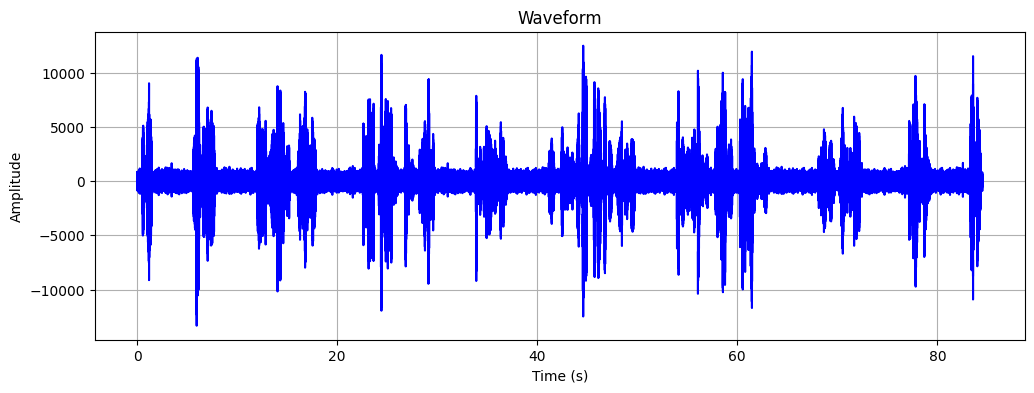

In [71]:
# 그래프 확인
import wave
import matplotlib.pyplot as plt
import numpy as np

# WAV 파일 경로
wav_file_path = '/content/drive/MyDrive/Q3/task3_05.wav'  # 실제 파일 경로로 대체해주세요

# WAV 파일 열기
with wave.open(wav_file_path, 'rb') as wav_file:
    # WAV 파일 데이터 읽기
    wav_data = wav_file.readframes(-1)
    wav_data = np.frombuffer(wav_data, dtype=np.int16)  # 바이너리 데이터를 numpy 배열로 변환

# 시간 배열 생성
frame_rate = wav_file.getframerate()
time = np.linspace(0, len(wav_data) / frame_rate, num=len(wav_data))

# 그래프 그리기
plt.figure(figsize=(12, 4))
plt.plot(time, wav_data, color='b')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [69]:
#잡음 제거
import os
from pydub import AudioSegment
from scipy.signal import butter, lfilter
import numpy as np

# 입력 디렉토리 경로
input_directory = '/content/drive/MyDrive/Q3'  # 실제 디렉토리 경로로 대체해주세요

# 출력 디렉토리 경로
output_directory = '/content/drive/MyDrive/Q3/'  # 실제 디렉토리 경로로 대체해주세요

# 잡음 제거를 위한 함수 정의
def butter_bandpass(lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# 입력 디렉토리 내의 모든 WAV 파일을 처리
for filename in os.listdir(input_directory):
    if filename.endswith(".wav"):
        input_wav_file = os.path.join(input_directory, filename)
        output_wav_file = os.path.join(output_directory, filename)

        # WAV 파일 불러오기
        audio = AudioSegment.from_file(input_wav_file, format="wav")

        # 잡음 제거 적용
        sample_rate = audio.frame_rate
        audio_data = np.array(audio.get_array_of_samples(), dtype=np.float64)
        filtered_audio_data = butter_bandpass_filter(audio_data, lowcut=500, highcut=1000, fs=sample_rate, order=6)

        # 잡음이 제거된 오디오 생성
        filtered_audio = AudioSegment(
            data=filtered_audio_data.astype(np.int16).tobytes(),
            sample_width=audio.sample_width,
            frame_rate=audio.frame_rate,
            channels=audio.channels
        )

        # 결과 저장
        if not os.path.exists(output_directory):
            os.makedirs(output_directory)

        filtered_audio.export(output_wav_file, format="wav")
        print(f"{input_wav_file}을(를) {output_wav_file}로 성공적으로 잡음 제거 후 저장하였습니다.")

/content/drive/MyDrive/Q3/task3_03.wav을(를) /content/drive/MyDrive/Q3/task3_03.wav로 성공적으로 잡음 제거 후 저장하였습니다.
/content/drive/MyDrive/Q3/task3_01.wav을(를) /content/drive/MyDrive/Q3/task3_01.wav로 성공적으로 잡음 제거 후 저장하였습니다.
/content/drive/MyDrive/Q3/task3_02.wav을(를) /content/drive/MyDrive/Q3/task3_02.wav로 성공적으로 잡음 제거 후 저장하였습니다.
/content/drive/MyDrive/Q3/task3_04.wav을(를) /content/drive/MyDrive/Q3/task3_04.wav로 성공적으로 잡음 제거 후 저장하였습니다.
/content/drive/MyDrive/Q3/task3_05.wav을(를) /content/drive/MyDrive/Q3/task3_05.wav로 성공적으로 잡음 제거 후 저장하였습니다.
